# Importing Libraries and Reading Data

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn. metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LogisticRegression


In [3]:
data = pd.read_csv("../../Git Hub/ml-basics/data/diabetes.csv").iloc[:,1:]

In [4]:
d = data.iloc[:,:-1]
label = data['Diabetic']

In [5]:
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
output = 'Diabetic'

In [6]:
data.head()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,0,171,80,34,23,43.509726,1.213191,21,0
1,8,92,93,47,36,21.240576,0.158365,23,0
2,7,115,47,52,35,41.511523,0.079019,23,0
3,9,103,78,25,304,29.582192,1.282870,43,1
4,1,85,59,27,35,42.604536,0.549542,22,0


In [7]:
data.shape

(15000, 9)

In [8]:
data.describe()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


# Handling Null Values

In [9]:
Missing_Col = ['PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI']

In [10]:
data.isnull().sum()

Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

In [11]:
for i in Missing_Col:
    d[i].replace(0,data[i].mean(),inplace = True)

<AxesSubplot:>

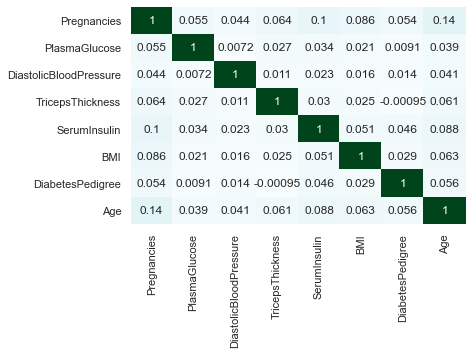

In [12]:
sns.heatmap(d.corr(), cbar = False,cmap = 'BuGn',annot=True)

In [64]:
def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()
    if not max_weight:
        max_weight = 2**np.ceil(np.log(np.abs(matrix).max())/np.log(2))
    ax.patch.set_facecolor('lightgray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    for (x, y), w in np.ndenumerate(matrix):
        color = 'black' if w > 0 else 'white'
        size = np.sqrt(np.abs(w))
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size, facecolor=color, edgecolor=color)
        ax.add_patch(rect)
    nticks = matrix.shape[0]
    ax.xaxis.tick_top()
    ax.set_xticks(range(nticks))
    ax.set_xticklabels(list(matrix.columns), rotation=90)
    ax.set_yticks(range(nticks))
    ax.set_yticklabels(matrix.columns)
    ax.grid(False)
    ax.autoscale_view()
    ax.invert_yaxis()

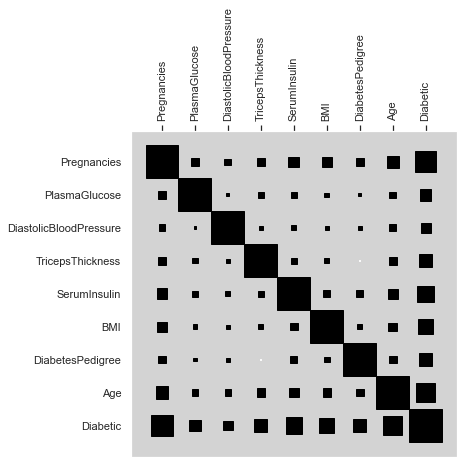

In [66]:
fig, ax = plt.subplots(figsize=(8,6)) 
axx = ax
hinton(data.corr())

# Ploting Graphs

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'PlasmaGlucose'}>,
        <AxesSubplot:title={'center':'DiastolicBloodPressure'}>],
       [<AxesSubplot:title={'center':'TricepsThickness'}>,
        <AxesSubplot:title={'center':'SerumInsulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigree'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Diabetic'}>]], dtype=object)

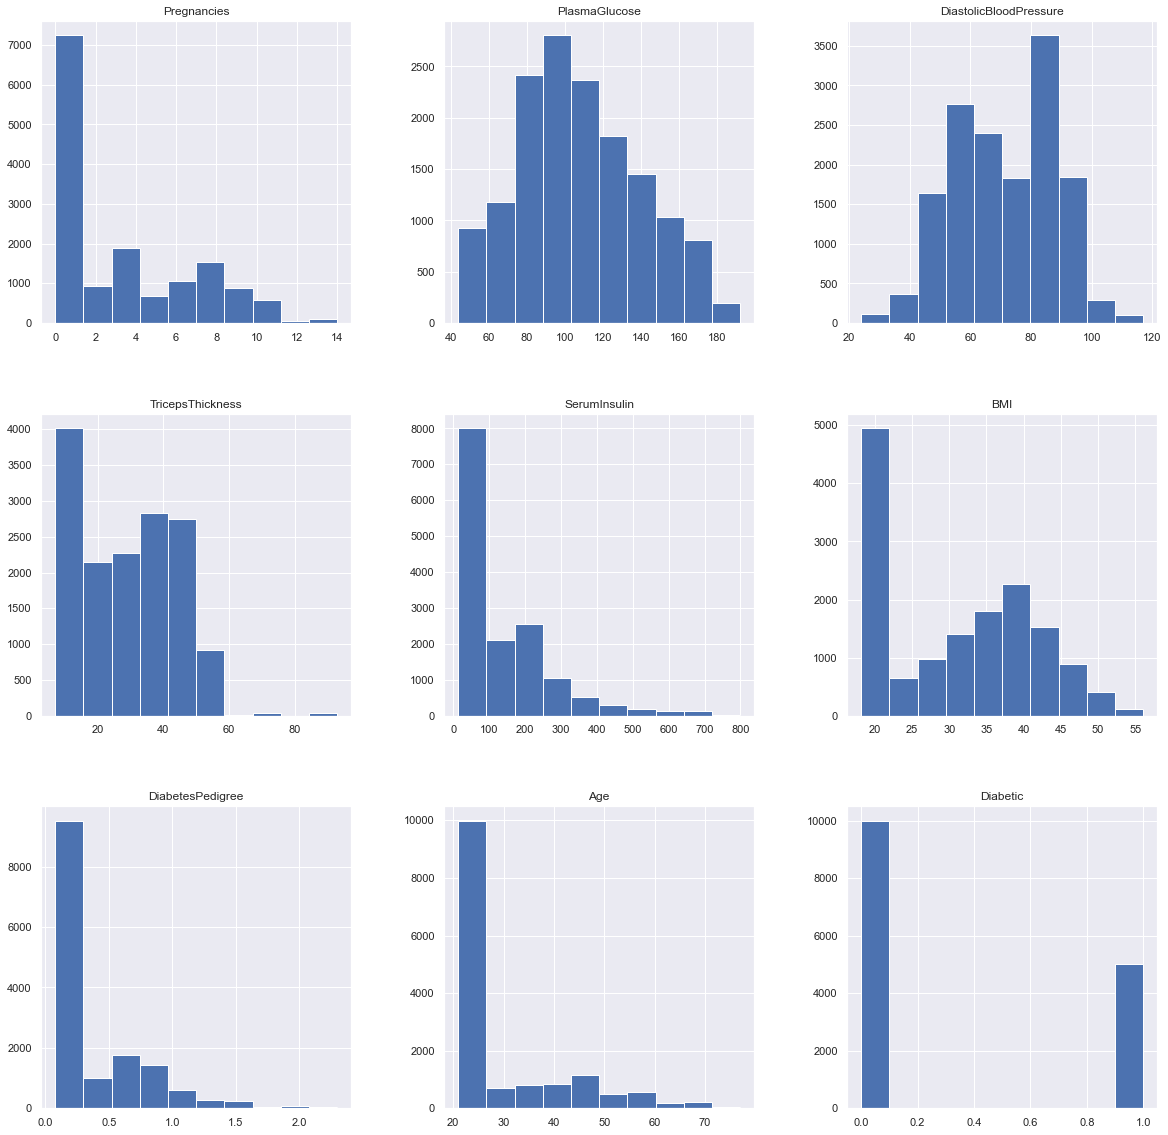

In [13]:
data.hist(figsize = (20,20))

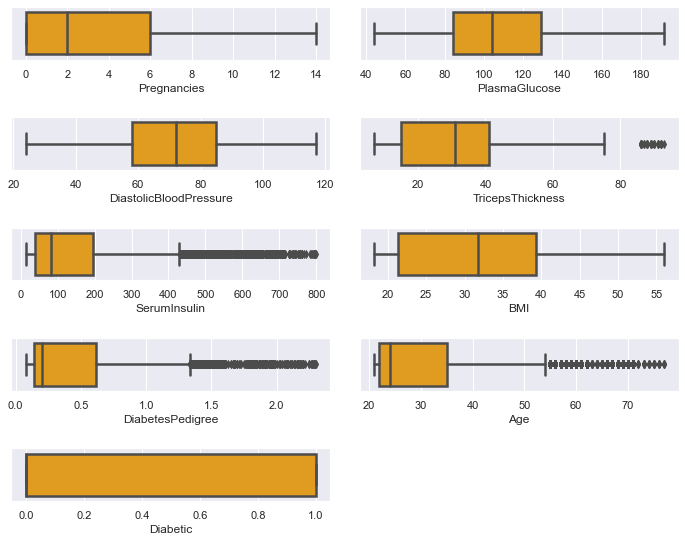

In [14]:
fig = plt.figure(figsize=(10,8))
for index,column in enumerate(list(data.columns)):
    plt.subplot(5,2,index+1)
    sns.boxplot(data.loc[:, column],color="Orange", linewidth=2.5)
fig.tight_layout(pad = 2)

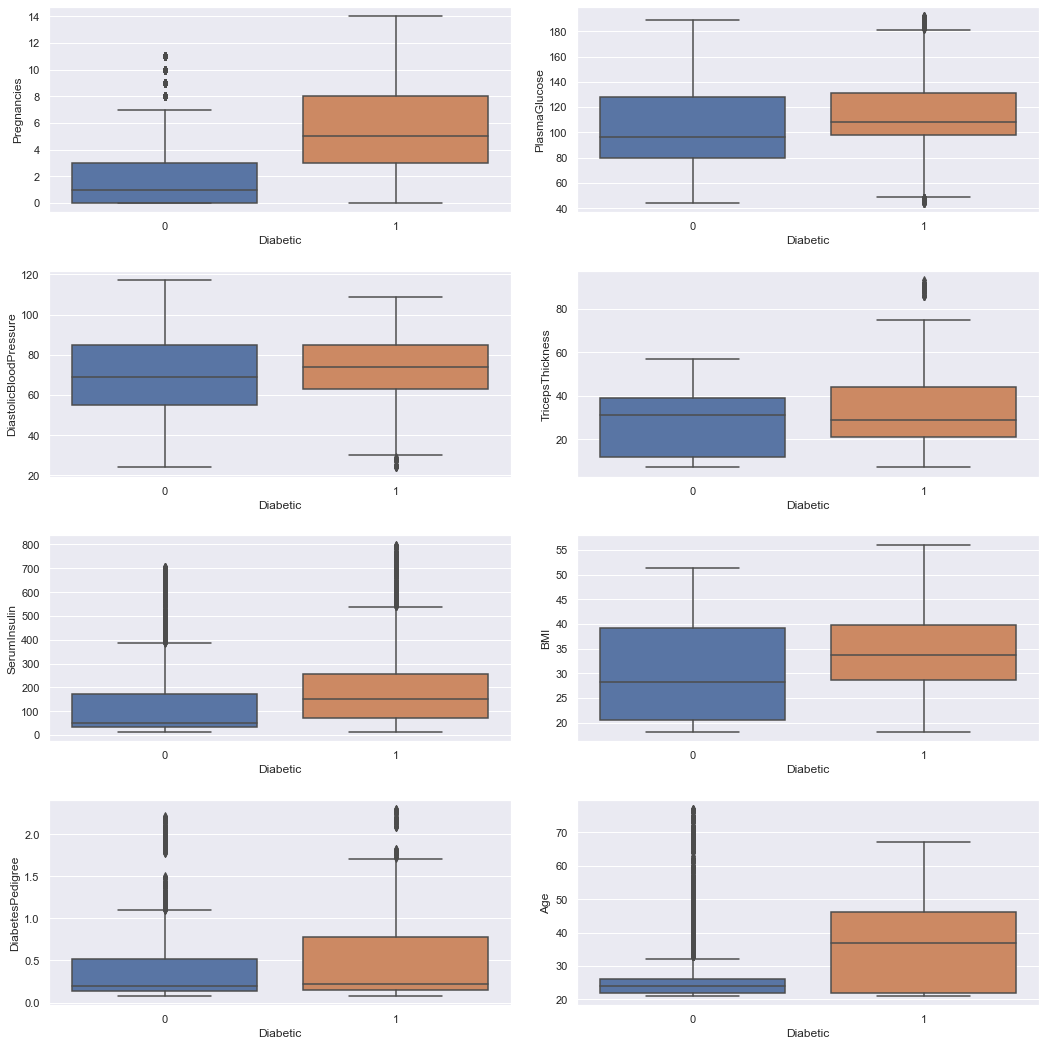

In [15]:
fig = plt.figure(figsize=(15,15))
for i,col in enumerate(list(d.columns)):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = label, y = d[col])
fig.tight_layout(pad = 2)

In [15]:
#sns.pairplot(data, hue = 'Diabetic')

# Handling Outliers

## Z - Score

In [16]:
z = np.abs(stats.zscore(data))
threshold = np.where(z > 2.5)

In [17]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
IQR

Pregnancies                 6.000000
PlasmaGlucose              45.000000
DiastolicBloodPressure     27.000000
TricepsThickness           26.000000
SerumInsulin              156.000000
BMI                        17.999804
DiabetesPedigree            0.478542
Age                        13.000000
Diabetic                    1.000000
dtype: float64

In [18]:
outlier = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

In [19]:
outlier.sum()

Pregnancies                  0
PlasmaGlucose                0
DiastolicBloodPressure       0
TricepsThickness            31
SerumInsulin               666
BMI                          0
DiabetesPedigree           475
Age                       1019
Diabetic                     0
dtype: int64

In [20]:
dz =data[(z < 2.5).all(axis=1)]

In [21]:
print("no.of outliers removed:",data.shape[0] - dz.shape[0])

no.of outliers removed: 1674


## IQR 

In [22]:
dIQR = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis = 1)]

In [23]:
print("no.of outliers removed:",data.shape[0] - dIQR.shape[0])

no.of outliers removed: 2055


# Test and Train Split

## IQR Outlier data

In [24]:
X, y = dIQR[features].values, dIQR[output].values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 9708
Test cases: 3237


### Logistic Regression

In [26]:
model = LogisticRegression().fit(X_train, y_train)

In [27]:
predictions = model.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.7998146431881371


In [28]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      2329
           1       0.69      0.52      0.59       908

    accuracy                           0.80      3237
   macro avg       0.76      0.71      0.73      3237
weighted avg       0.79      0.80      0.79      3237



In [29]:
cm = confusion_matrix(y_test, predictions)
print (cm)

[[2119  210]
 [ 438  470]]


### ROC Curve

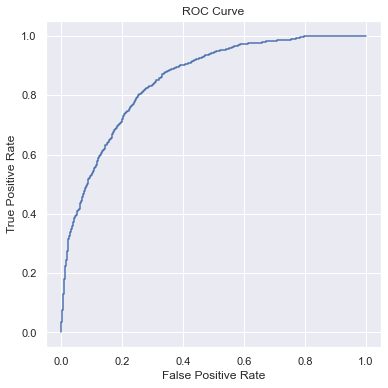

In [30]:
y_scores = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
fig = plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [31]:
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.8516412481581591


### Random Forest

In [32]:
model = RandomForestClassifier().fit(X_train, (y_train))
predictions = model.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.9400679641643497


In [33]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2329
           1       0.91      0.87      0.89       908

    accuracy                           0.94      3237
   macro avg       0.93      0.92      0.92      3237
weighted avg       0.94      0.94      0.94      3237



In [34]:
cm = confusion_matrix(y_test, predictions)
print (cm)

[[2255   74]
 [ 120  788]]


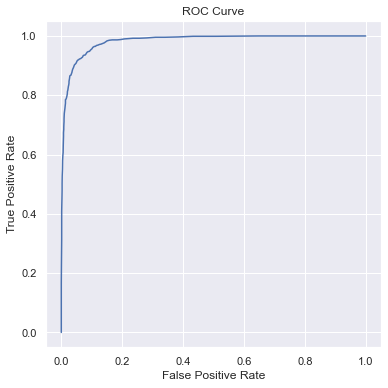

In [35]:
y_scores = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
fig = plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [36]:
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.9827982931170475


## Z-score outlier data

In [37]:
X, y = dz[features].values, dz[output].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 9994
Test cases: 3332


In [38]:
model = RandomForestClassifier().fit(X_train, (y_train))
predictions = model.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.9402761104441777


In [39]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2329
           1       0.91      0.89      0.90      1003

    accuracy                           0.94      3332
   macro avg       0.93      0.93      0.93      3332
weighted avg       0.94      0.94      0.94      3332



In [40]:
cm = confusion_matrix(y_test, predictions)
print (cm)

[[2239   90]
 [ 109  894]]


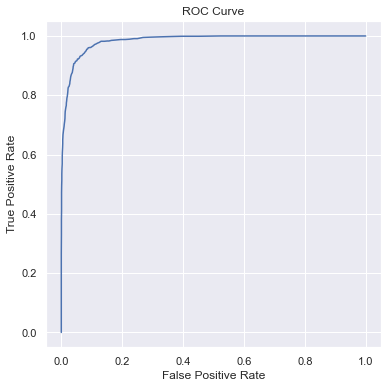

In [41]:
y_scores = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
fig = plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [42]:
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.9839716573765178


# Pure data

In [52]:
X, y = data[features].values, data[output].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, sampling_strategy = 1.0)
x_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print ('Training cases: %d\nTest cases: %d' % (x_train_res.shape[0], X_test.shape[0]))

Training cases: 15000
Test cases: 3750


In [59]:
model = RandomForestClassifier().fit(x_train_res, y_train_res)
predictions = model.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.932


In [60]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2500
           1       0.90      0.90      0.90      1250

    accuracy                           0.93      3750
   macro avg       0.92      0.92      0.92      3750
weighted avg       0.93      0.93      0.93      3750



In [61]:
cm = confusion_matrix(y_test, predictions)
print (cm)

[[2370  130]
 [ 125 1125]]


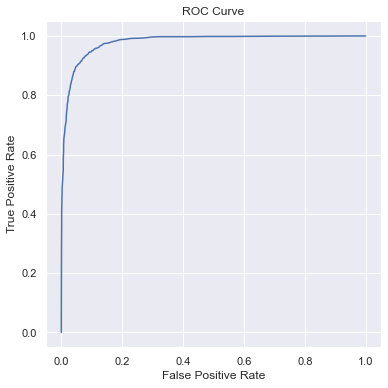

In [62]:
y_scores = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
fig = plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [63]:
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.9797184000000001
